In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

## Import libraries

In [2]:
# Standard import
import os
import requests

# Third party import

## Torch
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim as optim

## Data manipulation
import pandas as pd
import numpy as np

## Machine learning libraries


## Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Other
from tqdm import tqdm

In [7]:
def get_device():
    """Check that MPS is available, or cuda"""

    if torch.backends.mps.is_available():
        device = torch.device("mps")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
    else:
        device = torch.device("cpu")

    print(f"Device {device} selected")

    return device

device = get_device()

Device mps selected


## Explore Dataset


In [8]:
DATA_PATH = os.path.join(os.getcwd(),"data")
AML_SMALL_DATASET = os.path.join(DATA_PATH,"LI-Small_Trans.csv")
URL_DATA = (
    "https://drive.google.com/uc?export=download&id=1vRNPIhFbI9aeOzP4QTausZv3xX8GJbOO"
)
URL_DATA_2 = "https://drive.google.com/uc?export=download&id=10BY_NplIfbA9X1pLqS6JedOSPvAR23W0"

In [9]:
if not os.path.exists(AML_SMALL_DATASET):
    if not os.path.exists(DATA_PATH):
        try:
            os.makedirs(DATA_PATH)
        except OSError as error:  
            print(error) 

        print("Insert data into data/ directory")  
else:
    print("Data is downloaded!")
   

Data is downloaded!


In [13]:
df = pd.read_csv(AML_SMALL_DATASET)
df.sample(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
6439911,2022/09/09 18:13,67682,818DF4C90,168297,819139910,1650.56,Saudi Riyal,1650.56,Saudi Riyal,Wire,0
414496,2022/09/01 00:05,216,8175ECE40,216,8175ECE40,16.81,Saudi Riyal,16.81,Saudi Riyal,Reinvestment,0
1251816,2022/09/01 18:29,15284,8069E2DF0,15284,8069E2DF0,24614.28,US Dollar,24614.28,US Dollar,Reinvestment,0
5802794,2022/09/09 00:47,41014,810D7FAC0,1135,810E98AC0,158597.56,Mexican Peso,158597.56,Mexican Peso,Credit Card,0
4616762,2022/09/07 06:13,18890,8049B3040,26179,8153ABBD0,1392.82,US Dollar,1392.82,US Dollar,ACH,0
4926651,2022/09/07 17:47,26262,80B236700,7530,81976E4F0,263.20,Euro,263.20,Euro,Cheque,0
1877530,2022/09/02 07:47,21566,8013DB7D0,21566,8013DB7D0,374.59,Australian Dollar,265.14,US Dollar,ACH,0
2183641,2022/09/02 15:27,24029,8032B9270,212854,80AAF37B0,452.65,Euro,452.65,Euro,Wire,0
991152,2022/09/01 12:05,323947,8097F4940,119699,8097E2560,0.31,Rupee,0.31,Rupee,ACH,0
5164852,2022/09/08 02:28,20,800189450,1217,8001F1C50,26871.44,US Dollar,26871.44,US Dollar,Credit Card,0


In [17]:
df["Payment Currency"].value_counts()

Payment Currency
US Dollar            2553887
Euro                 1595859
Yuan                  483603
Rupee                 340641
Bitcoin               309240
Saudi Riyal           257948
Australian Dollar     211155
Yen                   210125
Brazil Real           199840
Canadian Dollar       176069
Shekel                174530
Swiss Franc           138251
UK Pound               99668
Ruble                  88492
Mexican Peso           84741
Name: count, dtype: int64

In [18]:
df.describe()

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,6.924049e+06,6.924049e+06,6.924049e+06,6.924049e+06,6.924049e+06
mean,5.938718e+04,8.441702e+04,6.324067e+06,4.676036e+06,5.148722e-04
std,9.051700e+04,9.064562e+04,2.105371e+09,1.544099e+09,2.268495e-02
min,0.000000e+00,0.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,2.190000e+02,1.125500e+04,1.742100e+02,1.753800e+02,0.000000e+00
50%,1.419500e+04,2.964000e+04,1.397620e+03,1.399440e+03,0.000000e+00
75%,1.106820e+05,1.480400e+05,1.229633e+04,1.222687e+04,0.000000e+00
max,3.769670e+05,3.769670e+05,3.644854e+12,3.644854e+12,1.000000e+00


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924049 entries, 0 to 6924048
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Timestamp           datetime64[ns]
 1   From Bank           int64         
 2   Account             object        
 3   To Bank             int64         
 4   Account.1           object        
 5   Amount Received     float64       
 6   Receiving Currency  object        
 7   Amount Paid         float64       
 8   Payment Currency    object        
 9   Payment Format      object        
 10  Is Laundering       int64         
 11  Date                object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 633.9+ MB


In [20]:
df["Is Laundering"].value_counts()

Is Laundering
0    6920484
1       3565
Name: count, dtype: int64

In [61]:
def plot_class_distribution(data, label:str, title: str = None):
    if title is None:
        title = label
    plt.figure(figsize=(10, 6))
    sns.countplot(x=label, data=data)
    plt.title(title)
    plt.xlabel("Class Label")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

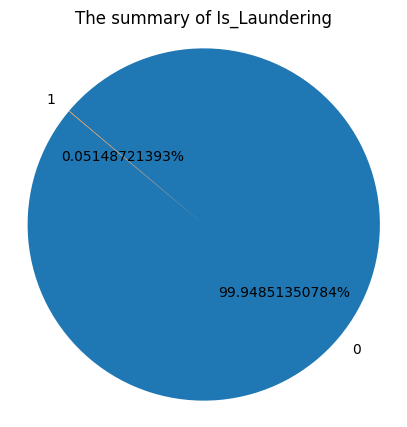

In [49]:
laundering_counts = df["Is Laundering"].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    laundering_counts,
    labels=laundering_counts.index,
    autopct="%1.11f%%",
    startangle=140,
)
plt.title("The summary of Is_Laundering")
plt.axis("equal") 

plt.show()

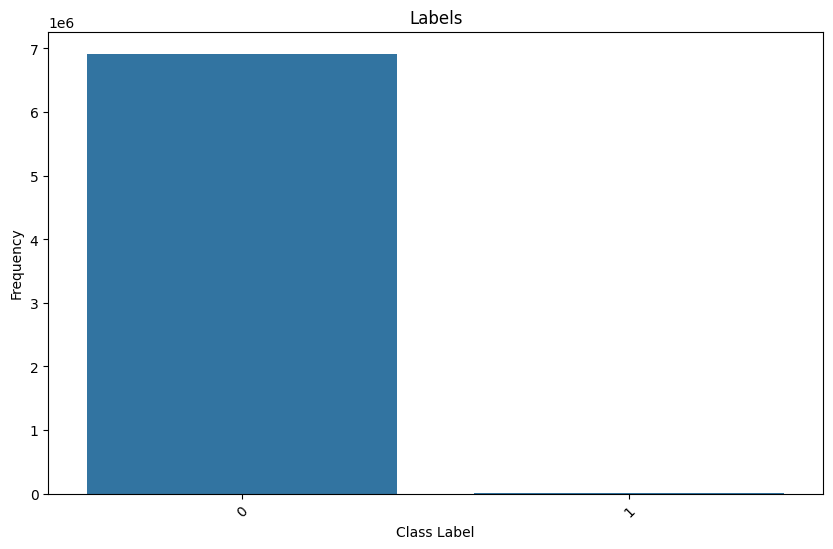

In [62]:
plot_class_distribution(df,"Is Laundering","Labels")

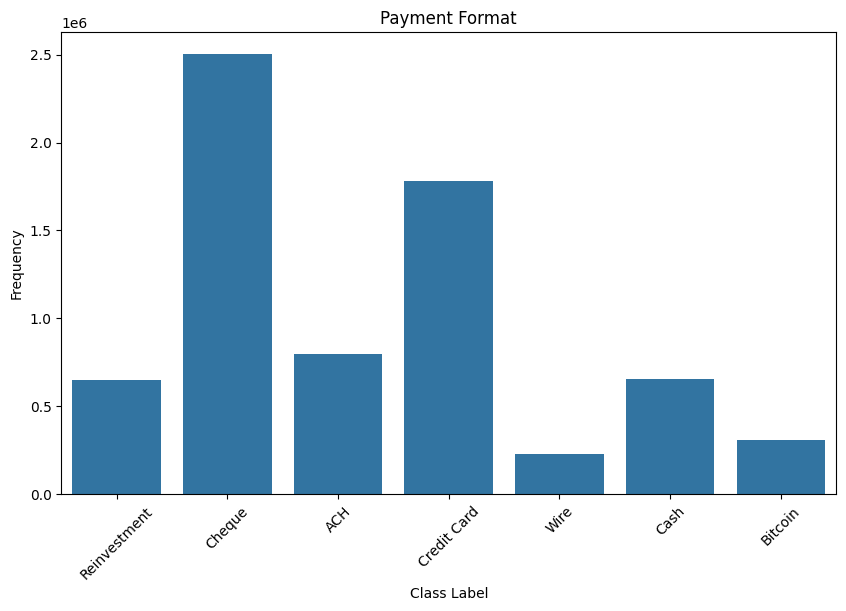

In [63]:
plot_class_distribution(df, "Payment Format", "Payment Format")

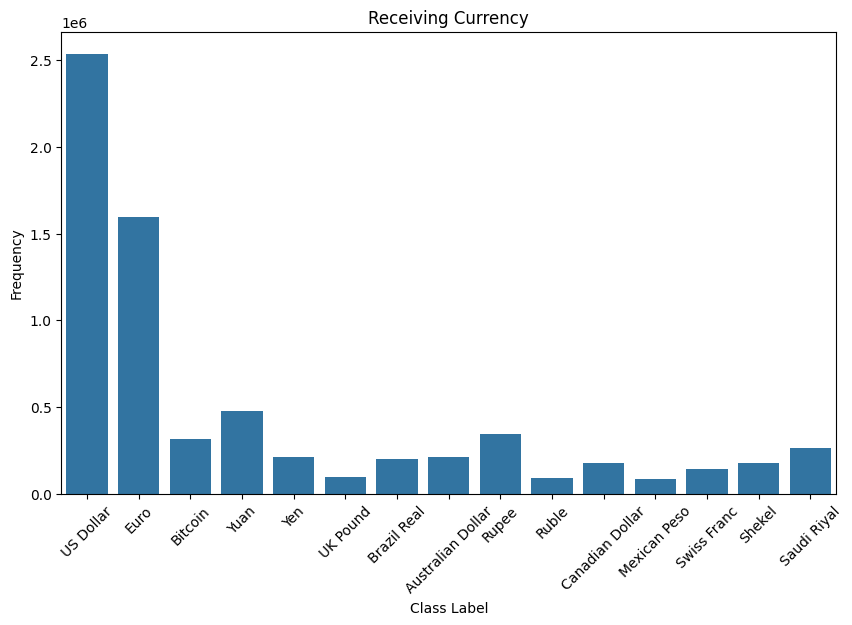

In [64]:
plot_class_distribution(df, "Receiving Currency", "Receiving Currency")

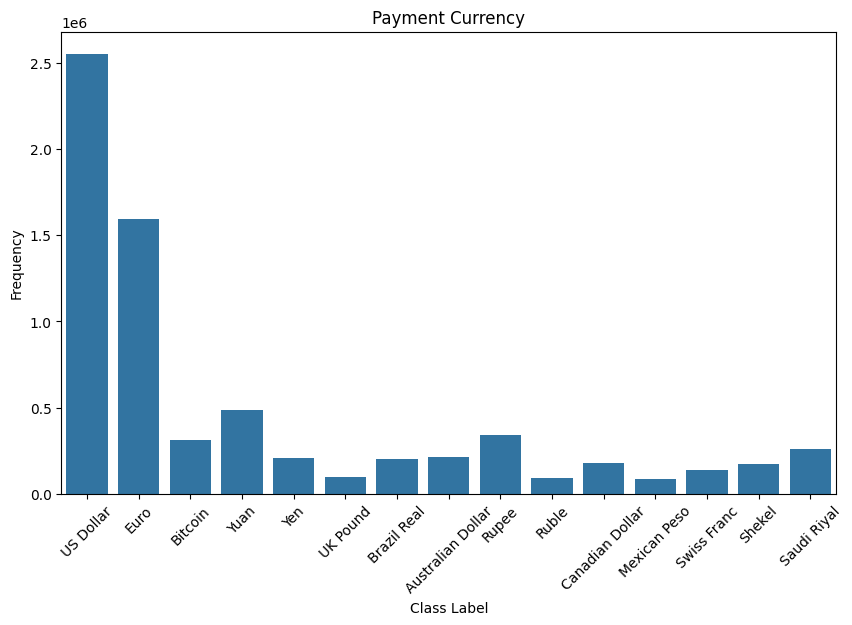

In [65]:
plot_class_distribution(df, "Payment Currency", "Payment Currency")

## Preprocess data
### Clean data

In [43]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [45]:
df["Date"] = df["Timestamp"].dt.date

In [46]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date
0,2022-09-01 00:08:00,11,8000ECA90,11,8000ECA90,3.195403e+06,US Dollar,3.195403e+06,US Dollar,Reinvestment,0,2022-09-01
1,2022-09-01 00:21:00,3402,80021DAD0,3402,80021DAD0,1.858960e+03,US Dollar,1.858960e+03,US Dollar,Reinvestment,0,2022-09-01
2,2022-09-01 00:00:00,11,8000ECA90,1120,8006AA910,5.925710e+05,US Dollar,5.925710e+05,US Dollar,Cheque,0,2022-09-01
3,2022-09-01 00:16:00,3814,8006AD080,3814,8006AD080,1.232000e+01,US Dollar,1.232000e+01,US Dollar,Reinvestment,0,2022-09-01
4,2022-09-01 00:00:00,20,8006AD530,20,8006AD530,2.941560e+03,US Dollar,2.941560e+03,US Dollar,Reinvestment,0,2022-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...
6924044,2022-09-10 23:39:00,71696,81B2518F1,71528,81C0482E1,3.346900e-02,Bitcoin,3.346900e-02,Bitcoin,Bitcoin,0,2022-09-10
6924045,2022-09-10 23:48:00,271241,81B567481,173457,81C0DA751,1.313000e-03,Bitcoin,1.313000e-03,Bitcoin,Bitcoin,0,2022-09-10
6924046,2022-09-10 23:50:00,271241,81B567481,173457,81C0DA751,1.305800e-02,Bitcoin,1.305800e-02,Bitcoin,Bitcoin,0,2022-09-10
6924047,2022-09-10 23:57:00,170558,81A2206B1,275798,81C1D5CA1,4.145370e-01,Bitcoin,4.145370e-01,Bitcoin,Bitcoin,0,2022-09-10


### Laundering data

In [66]:
df_laundering = df[df["Is Laundering"] == 1]

In [67]:
df_laundering

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date
38272,2022-09-01 00:02:00,70,10042B660,22661,805F7F2B0,7.083164e+04,US Dollar,7.083164e+04,US Dollar,Cash,1,2022-09-01
39028,2022-09-01 00:19:00,70,10042B660,212996,80609B4C0,3.370547e+04,US Dollar,3.370547e+04,US Dollar,Cash,1,2022-09-01
50683,2022-09-01 00:01:00,70,10042B660,11305,807861770,1.097976e+06,US Dollar,1.097976e+06,US Dollar,Cash,1,2022-09-01
127003,2022-09-01 00:00:00,11968,815630C40,249349,815635220,8.923300e+02,US Dollar,8.923300e+02,US Dollar,ACH,1,2022-09-01
136967,2022-09-01 00:25:00,70,10042B660,11968,816F93AF0,1.808140e+03,US Dollar,1.808140e+03,US Dollar,Cheque,1,2022-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...
6914370,2022-09-10 23:03:00,21939,812C4D330,41215,812C4D420,3.858790e+03,US Dollar,3.858790e+03,US Dollar,ACH,1,2022-09-10
6920167,2022-09-10 23:31:00,233465,814A02750,33219,814A02890,2.788770e+03,US Dollar,2.788770e+03,US Dollar,ACH,1,2022-09-10
6921098,2022-09-10 23:42:00,7839,807780F40,14652,8077814E0,1.168380e+03,Euro,1.168380e+03,Euro,ACH,1,2022-09-10
6921684,2022-09-10 23:31:00,216208,814C44D60,3460,814C44DB0,2.285860e+03,Euro,2.285860e+03,Euro,ACH,1,2022-09-10


###